# Evaporation, Penman Monteith

**Dr Ting Sun** (ting.sun@reading.ac.uk)

23 Sep 2018

## Measuring Humidity Fluxes

### (open-path) Infra-Red Gas Analyzer (IRGA)
![Gas analyser (source: ???)](../figures/gas-analyser.png)

content|wave length
---|---
Water Vapour |2.59 µm and 2.40 µm
Carbon Dioxide| 4.26 µm and 3.95 µm

### Lysimeters: 

* Small  
    ![a small lysimeter(source:???)](../figures/lysimeter-small.png)

* Large soil block: lifted onto weighing scale crops!
    ![installation of an in situ lysimeter](../figures/lysimeter-large1.png)
    ![operature over an in situ lysimeter](../figures/lysimeter-large2.png)
    

## Moisture Flux, Evaporation and Latent Heat!

symbol | meaning | unit
--- | --- | ---
$\overline{q}$ | Specific Humidity | ss
$\overline{w'q'}$|Moisture Flux| $\mathrm{kg \ {kg}^{-1}\ {m}^{-2}\ {m}^{-1}}$
$Q_E$ or $\lambda E$|Latent heat of vaporization|$\mathrm{J \ {kg}^{-1}}$
$E$| Evaporation|$\mathrm{mm \ {d}^{-1}}$

### approximations
Assumptions: 

* $20\ \mathrm{°C}$
* changes with $L_v$, $\rho_w$

water equivalent| energy equivalent
--- | --- 
$\mathrm{mm \ {d}^{-1}}$ |$\mathrm{28.3\ W \ {m}^{-2}}$
$\mathrm{mm \ {h}^{-1}}$ |$\mathrm{680\ W \ {m}^{-2}}$

## Model: Measurements @ 1 height
Penman Monteith – set of assumptions
![image.png](../figures/PM-assumption.png)

## Wind’s Influence on Evaporation  (from earlier class)

![image.png](../figures/PM-equation.png)

Modified Penman-Monteith equation:

$$Q_E=\frac{s(Q^*-Q_G)+c_p\rho{V}/r_a}{s+\gamma(1+r_s/r_a)}$$

where 

symbol|meaning|unit
--|--|--
s|slope of the saturation vapour pressure vs. temperature curve |Pa °C-1
Ca |heat capacity of air |J m-3 °C-1
γ 	|psychometric constant |Pa °C-1)
V 	|vapour pressure deficit of air |Pa
ra 	|aerodynamic resistance |
rs 	|surface resistance |

### Stomatal and Soil Resistance

![resistance-plant.png](../figures/resistance-plant.png)

#### Stomata - regulate water loss

![stomata (source: Getty Images)](../figures/stomata.jpg)


#### Canopy resistance depends on:  
* Plant type
   
   - Plant Roots: extend to where there is water
   ![image.png](../figures/plant-root.png)

* Temperature
* Soil Moisture
* Radiation


### Use of Resistances

$$\overline{w'\chi'}=\frac{\chi(z_2)-\chi(z_1)}{\gamma_\chi}$$

Electrical Analogy
![electrical-analogy.png](electrical-analogy.png)

Resistance network for a surface scheme
![resistance-network.png](resistance-network.png)

## The Combination Equation

- sensible heat flux
$$Q_H=\rho c_p \frac{T-T_0}{r_h}$$

- latent heat flux
$$Q_E=\frac{L_v}{R_v T} \frac{e-e_0}{r_v}=\frac{\rho c_p}{\gamma_*}\frac{e-e_0}{r_h}$$

- Linearize saturated vapour pressure
$$e_0=e_s(T_0)=e_s(T)-s(T-T_0)$$

where $s=\frac{d e_s}{dT}$

## Derivation of Penman Equation

### Goal: To obtain an expression of $Q_E$ as a function of 
* available energy

$$Q_a=Q^*-Q_G=Q_H+Q_E$$

  bear in mind the surface energy balance $Q^*-Q_G=Q_H+Q_E$ by neglecting: 1) advection heat $Q_{\text{adv}}$; and 2) anthropogenic heat: $Q_F$.
    
* surface level meteorological factors:
    - air temperature $T$
    - air humidity in vapour pressure $e(T)$

### Derivation using `sympy`

In [1]:
from sympy import *
init_printing()

In [2]:
qh,qe,qn,qg=symbols('Q_H,Q_E,Q^*,Q_G')
t,t0,et,e0,e,s=symbols('T,T_0,e_T,e_0,e,s')
rho,gms,cp,rh,rv=symbols(r'\rho,\gamma_*,c_p,r_h,r_v')

In [3]:
sol=solve([
    qn-qg-qh-qe,
    qe-(rho*cp/gms)*((e-e0)/rh),
    qh-(rho*cp*(t-t0)/rh),
    e0-et-s*(t-t0)
],
    [qe,qh,e0,t0])
sol_qe=sol.get(qe)

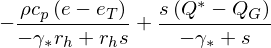

In [4]:
qa,de=symbols('Q_a,de')
apart(sol_qe.subs({qn:qa+qg,e:et+de}),qa).subs({qa:qn-qg,de:e-et})

## Penman (1948) Equation

* Penman equation:
$$Q_E=L_VE=\frac{s \left(Q^{*} - Q_{G}\right)}{- \gamma_* + s}- \frac{\rho c_{p} \left(e - e_{T}\right)}{- \gamma_* r_{h} + r_{h} s}$$

* Advantage:
    - estimation of evaporation from simple measurements
    - Using measurements at low heights: can neglect stability dependence of resistance
    - Approximate resistance for heat transfer by the aerodynamic resistance

* Remaing Challenge:
    - How to determine $\gamma_*=\gamma \frac{r_v}{r_h}$?


## Surface Transfers as Electrical Circuits

* Total resistance for vapour:
$${r_v}={r_s}+{r_h}$$

resistance network|real-world canopy
:-------------------------:|:-------------------------:
<img src="../figures/resistance-surface.png" width="100%">|<img src="../figures/canopy-real.png" width="100%">


## Exercises

1. Manual derivation of Penman (1948) equation.


2. The Penman Monteith equation provides one method to calculate the components of the surface energy balance. It assumes energy balance closure at each model time step (see notes below). Evaluate the performance of the PM calculations (QH and QE, β) using the EC data.


3. Calculate the canopy resistance from the EC and other data (this can be back-calculated). How do these values compare to the literature/textbooks?

    **note**: *You will need dry conditions (e.g. 12 h since rain – depending on time of day) and solar radiation for the calculations (e.g. $Q^* \gt \mathrm{20\ W \ {m}^{-2}}$)*